In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
tt=pd.read_csv("./train.csv")

In [3]:
tt.isnull().sum()#missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
tt#a piece of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
tx=tt.iloc[:,[2,4,5,6,7,9,11]]

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [7]:
le.fit(tx['Sex'])
print(le.classes_)
tx['Sex'] = le.transform(tx['Sex'])

['female' 'male']


In [8]:
sex=ohe.fit_transform(np.array([tx['Sex']]).T).toarray()
tx['Female'] = sex[:,0]
tx['Male'] = sex[:,1]
tx.drop("Sex", axis=1, inplace = True)
del(sex)

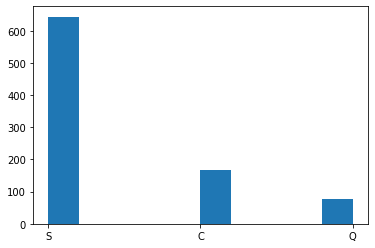

Number of Nan values in column Embarked:  2


In [9]:
plt.hist(tx['Embarked'][~tx['Embarked'].isnull()])
plt.show()
print('Number of Nan values in column Embarked: ' ,tx['Embarked'].isnull().sum())

In [10]:
for i in range(tx['Embarked'].size):
    if tx['Embarked'][i] not in ('S','C','Q'):
        tx['Embarked'][i] = 'S'

In [11]:
le.fit(tx['Embarked'])
print(le.classes_)
tx['Embarked'] = le.transform(tx['Embarked'])

['C' 'Q' 'S']


In [12]:
embarked=ohe.fit_transform(np.array([tx['Embarked']]).T).toarray()
for i,j in zip(('C','Q','S'),range(3)):
    tx[i] = embarked[:,j]
tx.drop("Embarked", axis=1, inplace = True)
del(embarked)

In [13]:
te=pd.read_csv("./test.csv")
te.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
for i in range(te['Fare'].size):
    if np.isnan(te['Fare'][i]):
        te['Fare'][i]=te['Fare'].mean()
        break

In [15]:
 for i in ('Cabin','PassengerId','Name','Ticket'):
    te.drop(i,axis=1,inplace=True)

In [16]:
le.fit(te['Sex'])
print(le.classes_)
te['Sex'] = le.transform(te['Sex'])

['female' 'male']


In [17]:
sex=ohe.fit_transform(np.array([te['Sex']]).T).toarray()
te['Female'] = sex[:,0]
te['Male'] = sex[:,1]
te.drop("Sex", axis=1, inplace = True)
del(sex)

In [18]:
le.fit(te['Embarked'])
print(le.classes_)
te['Embarked'] = le.transform(te['Embarked'])

['C' 'Q' 'S']


In [19]:
embarked=ohe.fit_transform(np.array([te['Embarked']]).T).toarray()
for i,j in zip(('C','Q','S'),range(3)):
    te[i] = embarked[:,j]
te.drop("Embarked", axis=1, inplace = True)
del(embarked)

In [20]:
tage=tx[tx['Age'].isnull()==False].values
tage=np.vstack((tage,te[te['Age'].isnull()==False].values))
Yage=tage[:,1]
tage=np.delete(tage,1,1)
nanage=tx[tx['Age'].isnull()].values
nanage=np.delete(nanage,1,1)
nanagete=te[te['Age'].isnull()].values
nanagete=np.delete(nanagete,1,1)

In [21]:
from sklearn.model_selection import train_test_split
xatr,xate,yatr,yate=train_test_split(tage,Yage,random_state=2)

In [22]:
from sklearn.linear_model import Lasso
from scipy.stats import skew
pred=Lasso()
sc=np.array([[0,0,0]])
for a in np.arange(0,2,0.1):
    pred.set_params(alpha=a)
    pred.fit(xatr,yatr)
    sc=np.vstack((sc,[a,pred.score(xatr,yatr),pred.score(xate,yate)]))
print(sc)

[[0.         0.         0.        ]
 [0.         0.24891445 0.17178161]
 [0.1        0.24703474 0.17503652]
 [0.2        0.24267495 0.17638376]
 [0.3        0.24093726 0.17758478]
 [0.4        0.23849511 0.17813346]
 [0.5        0.23535676 0.17800565]
 [0.6        0.23151912 0.17719939]
 [0.7        0.22698465 0.17571637]
 [0.8        0.22345089 0.1744408 ]
 [0.9        0.22068459 0.17335499]
 [1.         0.21759284 0.17191605]
 [1.1        0.21417565 0.17012396]
 [1.2        0.21043302 0.16797874]
 [1.3        0.20636321 0.16547897]
 [1.4        0.20196941 0.1626272 ]
 [1.5        0.19782398 0.15968701]
 [1.6        0.19366553 0.15658941]
 [1.7        0.1892388  0.15322596]
 [1.8        0.18454378 0.14959665]
 [1.9        0.17958047 0.14570149]]


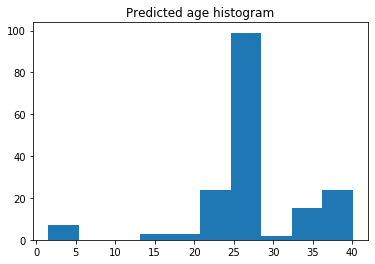

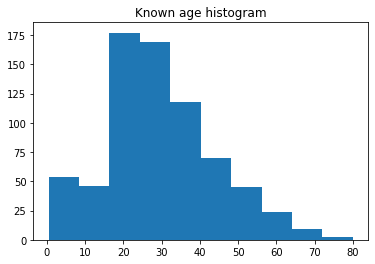

Stats for known age mean:  29.69911764705882 
std:  14.526497332334042 
skweness:  0.38910778230082704
Stats for predicted age mean:  27.240657687673686 
std:  7.4865007052000205 
skweness:  -0.8643353553476466


In [23]:
pred.set_params(alpha=0.4)
pred.fit(xatr,yatr)
page=pred.predict(nanage)
page=np.abs(page)
plt.hist(page,bins=10)
plt.title("Predicted age histogram")
plt.show()
plt.hist(tx['Age'],bins=10)
plt.title("Known age histogram")
plt.show()
print("Stats for known age mean: ",tx['Age'].mean(),
      "\nstd: ",tx['Age'].std(),
      "\nskweness: ",tx['Age'].skew())
print("Stats for predicted age mean: ",np.mean(page),
      "\nstd: ",np.std(page),
      "\nskweness: ",skew(page))

In [24]:
for i in page:
    for j in range(tx['Age'].size):
        if np.isnan(tx['Age'][j]):
            tx['Age'][j]=i
pagete=pred.predict(nanagete)
for i in page:
    for j in range(te['Age'].size):
        if np.isnan(te['Age'][j]):
            te['Age'][j]=i

In [25]:
print('training data:\n',tx.isnull().sum(),'\ntest data:\n',te.isnull().sum())

training data:
 Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Female    0
Male      0
C         0
Q         0
S         0
dtype: int64 
test data:
 Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Female    0
Male      0
C         0
Q         0
S         0
dtype: int64


In [26]:
cab=pd.read_csv("./train.csv")
for i in range(cab['Cabin'].size):
    try:
        if np.isnan(cab['Cabin'][i]):
            cab['Cabin'][i]=0
    except:
        cab['Cabin'][i]=1
cab=cab['Cabin'].values
tx["Cabin"]=cab
cab=pd.read_csv("./test.csv")
for i in range(cab['Cabin'].size):
    try:
        if np.isnan(cab['Cabin'][i]):
            cab['Cabin'][i]=0
    except:
        cab['Cabin'][i]=1
cab=cab['Cabin'].values
te["Cabin"]=cab

In [27]:
tit=pd.read_csv("./train.csv")
arr=[]
for j in ('Miss.','Mrs.','Ms.'):
    for i in range(tit['Name'].size):
        if j in tit['Name'][i]:
            arr.append(1)
        else:
            arr.append(0)
    arr=np.array(arr)
    tx[j]=arr
    arr=[]
tit=pd.read_csv("./test.csv")
arr=[]
for j in ('Miss.','Mrs.','Ms.'):
    for i in range(tit['Name'].size):
        if j in tit['Name'][i]:
            arr.append(1)
        else:
            arr.append(0)
    arr=np.array(arr)
    te[j]=arr
    arr=[]

In [28]:
te

,Pclass,Age,SibSp,Parch,Fare,Female,Male,C,Q,S,Cabin,Miss.,Mrs.,Ms.
0,3,34.500000,0,0,7.8292,0.0,1.0,0.0,1.0,0.0,0,0,0,0
1,3,47.000000,1,0,7.0000,1.0,0.0,0.0,0.0,1.0,0,0,1,0
2,2,62.000000,0,0,9.6875,0.0,1.0,0.0,1.0,0.0,0,0,0,0
3,3,27.000000,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,0,0,0,0
4,3,22.000000,1,1,12.2875,1.0,0.0,0.0,0.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,26.765666,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0,0,0,0
414,1,39.000000,0,0,108.9000,1.0,0.0,1.0,0.0,0.0,1,0,0,0
415,3,38.500000,0,0,7.2500,0.0,1.0,0.0,0.0,1.0,0,0,0,0
416,3,26.765666,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0,0,0,0


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
Xtr,Xte,Ytr,Yte=train_test_split(tx.values,tt['Survived'].values,random_state=9)
Ytr.shape=(Ytr.shape[0],1);
Yte.shape=(Yte.shape[0],1);

In [30]:
gbc=GradientBoostingClassifier(max_depth=4,n_estimators=850)
sc=np.array([[0,0,0,0]])
for n in range(40,91,4):
    for a in np.arange(0.005,0.21,0.005):
        gbc.set_params(learning_rate=a,n_estimators=n)
        gbc.fit(Xtr,Ytr)
        sc=np.vstack((sc,[n,a,gbc.score(Xtr,Ytr),gbc.score(Xte,Yte)]))

In [31]:
sc=np.delete(sc,0,0)

In [32]:
foundarg=np.argmax(sc[:,3])
print(np.max(sc[:,3]))
print(foundarg)
print(sc[foundarg])
print(sc)

0.8116591928251121
109
[48.          0.14        0.9251497   0.81165919]
[[4.00000000e+01 5.00000000e-03 6.27245509e-01 5.82959641e-01]
 [4.00000000e+01 1.00000000e-02 8.20359281e-01 7.44394619e-01]
 [4.00000000e+01 1.50000000e-02 8.50299401e-01 7.66816143e-01]
 ...
 [8.80000000e+01 1.95000000e-01 9.67065868e-01 7.98206278e-01]
 [8.80000000e+01 2.00000000e-01 9.64071856e-01 7.93721973e-01]
 [8.80000000e+01 2.05000000e-01 9.71556886e-01 7.89237668e-01]]


In [33]:
gbc.set_params(learning_rate=0.01,n_estimators=90,max_depth=4)
gbc.fit(Xtr,Ytr)
print(gbc.score(Xtr,Ytr),gbc.score(Xte,Yte))

0.8622754491017964 0.7623318385650224


In [34]:
df = pd.DataFrame((np.array([list(range(892,1310)),gbc.predict(te.values)])).T, columns = ['PassengerId','Survived']) 

In [35]:
df.to_csv('./ans2.csv',index=False)

In [36]:
test1=pd.read_csv("./best.csv")
test2=pd.read_csv("./ans2.csv")

In [37]:
for i in range(test1['Survived'].size):
    if test1['Survived'][i]!=test2['Survived'][i]:
        print(i)

In [38]:
for i in range(test1['Survived'].size):
    if test1['Survived'][i]!=test2['Survived'][i]:
        print(i)